In [1]:
import sys
sys.path.insert(0, '/home/ldoyle/packages')
import h5py
import numpy as np
from tqdm import tqdm
import matplotlib

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import pysindy as ps
from lr_ed import localreg
from datetime import datetime
from scipy.fft import fft, fftfreq,rfft2

import scipy.signal as signal
from obspy.signal import filter as obsfilt
import glob
from pyproj import Proj



In [2]:
file_list = glob.glob("/home/ldoyle/notebooks/rad_10_smooth_data/*")
n = 1.4682
L = 51.04762

b=0
for q in np.arange(2,7):
    if b==0:
        working_dat = np.load(file_list[q])
        b=1
    else:
        working_dat = np.hstack((working_dat, np.load(file_list[q])))

# working_dat = np.load(file_list[15])
working_dat = ((2*np.pi)/2**16)*((1550.12 * 1e-9)/(0.78 * 4 * np.pi * n * L))*working_dat#[:,::10]
working_dat = working_dat *10**6#/(np.std(working_dat))
working_dat = working_dat[:,::10].T
mean_remove = (working_dat - np.mean(working_dat,axis=0)).T

working_dat = mean_remove.reshape(working_dat.shape[1],working_dat.shape[0])


In [3]:
print(working_dat.shape)
print(np.amax(working_dat))
print(np.amin(working_dat))

(5000, 6000)
1.9783986066197787
-1.948681685699635


In [4]:
# pca = PCA(n_components=5, svd_solver='full')
# pca.fit(working_dat[:,:,0])
# print(pca.explained_variance_ratio_)


In [5]:
pca2 = PCA(n_components=10, svd_solver='arpack')
pca2.fit(working_dat.T)
print(pca2.explained_variance_ratio_)


[0.24779262 0.24303444 0.10886124 0.10197783 0.04692071 0.0434123
 0.03116357 0.03008142 0.0226541  0.02234953]


In [7]:
sum(pca2.explained_variance_ratio_)


0.898247763962407

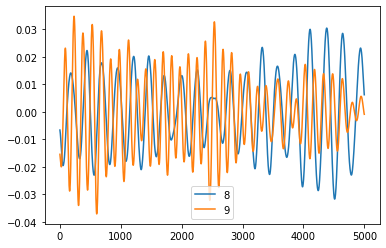

In [12]:
plt.figure()
for el in range(7,9): #np.arange(len(pca2.components_)):
    plt.plot(pca2.components_[el],label=str(el+1))
    
plt.legend()
plt.show()


In [9]:
tr = pca2.transform(working_dat.T)
inv_tr = pca2.inverse_transform(tr)

In [10]:
np.mean(np.abs(inv_tr - working_dat.T))/np.mean(np.abs(working_dat))

0.3111722120846423

In [7]:
pca2.n_samples_

6000

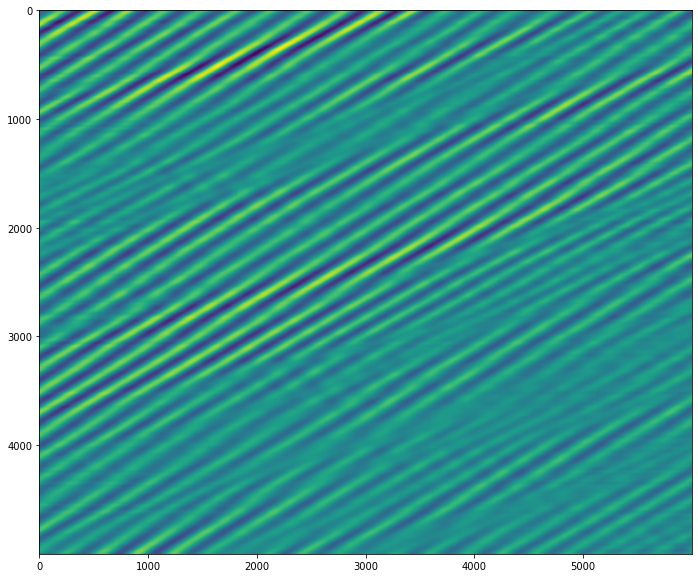

In [6]:
plt.figure(figsize=(12,10))
plt.imshow(working_dat[:,:,0])
plt.show()

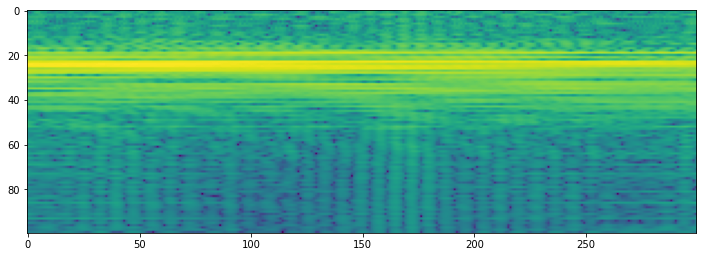

In [29]:
spec = fft(working_dat,axis=0)[0:100,::20]
plt.figure(figsize=(12,10))
plt.imshow(np.log(np.abs(spec**2)))
plt.show()

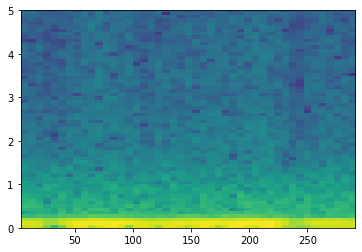

In [40]:
plt.figure()
plt.specgram(working_dat[2000,:],Fs=20)
plt.ylim(0., 5.)
plt.show()